<h1>Introduction</h1>
<p>
This notebook includes code and commentary for playing a Normal Form Game (NFG). The code included is used to calculate the strategies for players.  
</p>
<p>
The begin with, the NFG in this notebook uses a payoff function for Stag Hunt. 
</p>
<p>
Stag hunt is a two player game which includes two actions. The actions are stag and hare. If both players choose stag, then the reward for both players is 5. If both players choose hare, then the reward for both players is 1. If one player chooses hare, and the other player chooses stag, then the player who chose hare gets a reward of 2, while the player who choose stag gets a reward of 0. These rewards, the payoff function, are represented as a matrix in the next cell in this notebook.
</p>
<p>Payoff functions for other NFG are included subsequently in this notebook for testing purposes and validation</p>

In [1]:
# Stag Hunt Payoff Matrix
payoffs = [
    [[5, 5], [0, 2]],
    [[2, 0], [1, 1]]
]

<h3>Calculate Normal Form Games Rewards</h3>
<p>Normal Form Games which have a payoff function represented by a matrix like the one above for Stag Hunt, involve two players. Players are referred to as row player and column player. The rewards for each player are determined from the actions choosen by a player and the opposing player. What follows is a function which accepts 3 parameters to calculate expected payoffs and also includes formulas to calculate incentives to change. Note that the code in this function for calculating payoffs is based on the formulas described in section 2.5.1 of the article which is included in this repository along with this notebook.</p>
<p>The function below, calc_values, is used to calculate the rewards for two players on a single game. Both players pick a probability action for one of the actions, and these values get passed to the function along with the payoff function (matrix/rewards). The function returns the results of all the calculations.</p>
<p><b>Note 1:</b> The function currently only works for 2 players, 2 actions NFG. The references to payoff matrix values are hardcoded just to show the relationship between values and calculations. For example rewards[1][1][0] refers to payoff of 1. Later on in the notebook, this function is evolved so these values are not hardcoded and more than 2 actions can be handled.</p>
<p><b>Note 2:</b> The incentive to change calculations in calc_values function below, are not required in this experiment, and are included here just for validation and testing purposes. They are useful for checking where Nash Equilibria exists.</p>

In [2]:
def calc_values(x_prob, y_prob, rewards):
    # array to store all values - probabilities, payoffs and incentives to change
    values = []
    # calculate and set probability values
    x_prob_first = x_prob # e.g. stag value for player 1 - row
    x_prob_second = y_prob # e.g. stag value for player 2 - column
    y_prob_first = 1 - x_prob # e.g. hare value for player 1 - row
    y_prob_second = 1 - y_prob # e.g. hare value for player 2 - column

    # assign and calculate expected reward/payoff values
    row_e_x = (rewards[0][0][0] * x_prob_second) + (rewards[0][1][0] * y_prob_second) 
    row_e_y = (rewards[1][0][0] * x_prob_second) + (rewards[1][1][0] * y_prob_second) 
    row_e_total = (row_e_x * x_prob_first) + (row_e_y * y_prob_first)
    col_e_x = (rewards[0][0][1] * x_prob_first) + (rewards[1][0][1] * y_prob_first)
    col_e_y = (rewards[0][1][1] * x_prob_first) + (rewards[1][1][1] * y_prob_first)
    col_e_total = (col_e_x * x_prob_second) + (col_e_y * y_prob_second)

    # assign and calculate incentive values for changing probabilities
    # These change variables, if set to 0, then no incentive to 
    # change these values
    x_first_change = max(0, row_e_x - row_e_total) # change stag value for player 1
    y_first_change = max(0, row_e_y - row_e_total) # change hare value for player 1
    x_second_change = max(0, col_e_x - col_e_total) # change stag value for player 2
    y_second_change = max(0, col_e_y - col_e_total) # change hare value for player 2

    # get sum of payoff and sum of incentives to change
    sum_change = x_first_change + y_first_change + x_second_change + y_second_change 
    sum_payoff = row_e_total + col_e_total
    sum_second_change = x_second_change + y_second_change # get sum of incentives to change for second player(column) only, useful for advising col player

    # add values to array and return this array from the function
    values.extend([x_prob_first, x_prob_second, y_prob_first, y_prob_second])
    values.extend([row_e_x, row_e_y, row_e_total, col_e_x, col_e_y, col_e_total])
    values.extend([x_first_change, y_first_change, x_second_change, y_second_change])
    values.extend([sum_change, sum_payoff, sum_second_change])

    return values


<p>
Below, running a test on the calc_values function. Player 1 (row player) has action probability for stag set to 0.3, while Player 2 (column player) has action probability for stag set to 0.7. This means action probability for Player 1 for hare is set to 0.7 (1 - 0.3), and action probability for Player 2 for hare is set to 0.3 (1 - 0.7). The calc_values function returns an array which is printed to the screen.
</p>

In [3]:
# test code for calc_values function
values = calc_values(0.3, 0.7, payoffs)
print(values)

[0.3, 0.7, 0.7, 0.30000000000000004, 3.5, 1.7, 2.24, 1.5, 1.2999999999999998, 1.44, 1.2599999999999998, 0, 0.06000000000000005, 0, 1.3199999999999998, 3.68, 0.06000000000000005]


<h3>Calculated Values</h3>
<p>
For now, the values from the returned array from calc_values which are of interest are row_e_x, row_e_y, row_e_total, col_e_x, col_e_y, col_e_total. From the printout of the array, these values are as follows:
</p>
<table>
    <tr>
        <td></td><th>Expected Stag Payoff</th><th>Expected Hare Payoff</th><th>Expected Total Payoff</th>
    </tr>
    <tr>
        <th>Player 1 (row)</th><td>3.5</td><td>1.7</td><td>2.24</td>
    </tr>
    <tr>
        <th>Player 2 (column)</th><td>1.5</td><td>1.3</td><td>1.44</td>
    </tr>
</table>
<b>Note: </b> Values are rounded for presentation purposes
<p>Player 1 achieves a total payoff of 2.24 when it uses an action probability of 0.3 for stag and it is playing an opponent, player 2, who uses an action probability of 0.7 for stag.</p>
<p>Player 2 achieves a total payoff of 1.44 when it uses an action probability of 0.7 for stag and it is playing an opponent, player 1, who uses an action probability of 0.3 for stag.</p>

<h3>Responses</h3>
<p>
The responses function in the cell below is used to get all payoffs for a player when an opponents action strategy is fixed. Payoffs for each of the increments is calculated using the calc_values function described above. Using the responses function, one of the players action probabilities are fixed. The payoffs for each player are then calculated using the calc_values function using different action probabilities for the opponent. The action probabilities for the opponent are set at different increments.
</p>
<p>
An example of this is, player 1 fixes its action probability for stag to 0. Player 2 uses an action probability on stag of 0. The payoffs for both players are calculated. Then player 2 uses an action probability on stag of 0.25, if its increments value is set to 0.25, while player 1, keeps its action probability for stag at 0. The payoffs for both players are calculated. Then player 2 uses an action probability on stag of 0.5, if its increments value is set to 0.25, while player 1, keeps its action probability for stag at 0. The payoffs for both players are calculated. Then player 2 uses an action probability on stag of 0.75, if its increments value is set to 0.25, while player 1, keeps its action probability for stag at 0. The payoffs for both players are calculated. Then player 2 uses an action probability on stag of 1, if its increments value is set to 0.25, while player 1, keeps its action probability for stag at 0. The payoffs for both players are calculated.   
</p>
<p>
Such an approach is used in order to determine, what is the best payoff player 2 can achieve, when player 1 action probabilities are fixed. What action probabilities should player 2 use against player 1 in this kind of scenario to achieve the best payoff. Please note, it may not be the best payoff but it will be the best payoff using the increment values. Typically a lower value than 0.25 on the increments will be used to deteremine a value which is the best possible payoff or at least one that is close. Used increments of 0.25 in this example just to demonstrate the idea here.
</p>

In [4]:
def responses(fixed, incr):
    rewards_col = []
    rewards_row = []
    incrs = []
    incentives = []
    total_payoffs = []
    second_incentives = []
    index = 0
    action = 0
    while action <= 1:
        values = calc_values(fixed, action, payoffs)
        incrs.append(action)
        rewards_col.append(values[9])
        rewards_row.append(values[6])
        incentives.append(values[len(values) - 3])
        total_payoffs.append(values[len(values) - 2])
        second_incentives.append(values[len(values) - 1])
        action += incr
        index += 1

    return rewards_row, rewards_col, incrs, incentives, total_payoffs, second_incentives

<p>
The responses function in the cell below is executed using the values described above. Player 1 action probability for stag set to 0, while player 2 uses increments of 0.25 on action probabilities for stag playing player 1. 
</p>
<p>
The results returned from the responses function are printed to the screen. Note that results are obtained from the values array returned from the calc_values function using hardcoded values. For example, values[9], contains the total payoff for player 2 (column player). This code could be rewritten so there is not a reliance on hardcoded values, but left as is for now as it is just used to demonstrate the concept described.  
</p>

In [5]:
#Testing responses function - fix row player stag value to 0, and get payoffs for both players when column player from 0 to 1 in steps of 0.25
rewards_row, rewards_col, incrs, incentives, total_payoffs, second_incentives = responses(0, 0.25)
print("row rewards:", rewards_row)
print("col rewards:", rewards_col) 
print("increments:", incrs) 
print("incentives:", incentives)
print("total payoffs:", total_payoffs)
print("Minimum incentive value:", min(incentives), " at index:", incentives.index(min(incentives)))
print("Second Incentives:", second_incentives) # For stag, incentives total for hare and stag on player playing against fixed stag action

row rewards: [1, 1.25, 1.5, 1.75, 2.0]
col rewards: [1, 0.75, 0.5, 0.25, 0.0]
increments: [0, 0.25, 0.5, 0.75, 1.0]
incentives: [0, 0.25, 1.5, 2.75, 4.0]
total payoffs: [2, 2.0, 2.0, 2.0, 2.0]
Minimum incentive value: 0  at index: 0
Second Incentives: [0, 0.25, 0.5, 0.75, 1.0]


<p>
The results of interest for the now, are the row rewards (player 1), and col rewards (player 2). These are now presented as follows: 
</p>
<table>
    <tr>
        <th>P(S)_P1</th><th>P(S)_P2</th><th>P1_Payoff</th><th>P2_payoff</th>
    </tr>
    <tr>
        <td>0</td><td>0</td><td>1</td><td>1</td>
    </tr>
    <tr>
        <td>0</td><td>0.25</td><td>1.25</td><td>0.75</td>
    </tr>
    <tr>
        <td>0</td><td>0.5</td><td>1.5</td><td>0.5</td>
    </tr>
    <tr>
        <td>0</td><td>0.75</td><td>1.75</td><td>0.25</td>
    </tr>
    <tr>
        <td>0</td><td>1</td><td>2</td><td>0</td>
    </tr>
</table>
<b>Note:</b> Headings in table - P(S)_P1 represents action probability for stag for player 1. P(S)_P2 represents action probability for stag for player 2. P1_Payoff represents total payoff for player 1. P2_Payoff represents total payoff for player 2.
<p>
From the table above, when player 1 is using a fixed strategy on action probability for stag of 0, the best responses for player 2 to this strategy is to sets its action probability for stag to 0. This gives player 2 the best payoff, which is 1, in this example using increments of 0.25. 
</p>
<p>
In the cell below is some code to generate a plot showing the payoffs for each player in this example at each increment point. The total payoffs are included for completeness, to show the group (all players) payoff. 
</p>

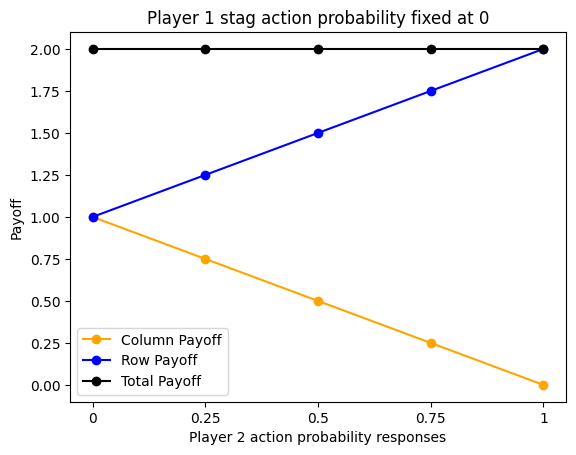

In [6]:
#Provide a graph based on the values returned from responses function and printed out above
import matplotlib.pyplot as plt

# Values for column payoffs
x_values = incrs  
y_values = rewards_col  
plt.plot(x_values, y_values, marker='o', color="orange", label="Column Payoff")
# Values for row payoffs
y_values = rewards_row  
plt.plot(x_values, y_values, marker='o', color="blue", label="Row Payoff")
# Values for total payoffs
y_values = total_payoffs  
plt.plot(x_values, y_values, marker='o', color="black", label="Total Payoff")

x_ticks = [0, 0.25, 0.5, 0.75, 1]
x_labels = ['0', '0.25', '0.5', '0.75', '1']
plt.xticks(x_ticks, x_labels)

plt.xlabel('Player 2 action probability responses')
plt.ylabel('Payoff')
plt.title('Player 1 stag action probability fixed at 0')
plt.legend()
plt.show()

<h3>Test Responses</h3>
<p>
Perform another similar test, showing results and graph for payoffs at <b>intervals of 0.01</b> for both players when player 1 is fixed at an action probability of 0 on stag and when player 2 uses an action probability of 0, then 0.01, then 0.02 etc ... up to 1. 
</p>

In [7]:
#Testing responses function - fix row player stag value to 0, and get payoffs for both players when column player from 0 to 1 in steps of 0.01
rewards_row, rewards_col, incrs, incentives, total_payoffs, second_incentives = responses(0, 0.01)
print("row rewards:", rewards_row)
print("col rewards:", rewards_col) 
print("increments:", incrs) 
print("total payoffs:", total_payoffs)

row rewards: [1, 1.01, 1.02, 1.03, 1.04, 1.05, 1.06, 1.0699999999999998, 1.08, 1.09, 1.1, 1.1099999999999999, 1.1199999999999999, 1.13, 1.14, 1.15, 1.16, 1.17, 1.18, 1.19, 1.2, 1.21, 1.22, 1.23, 1.24, 1.25, 1.2600000000000002, 1.27, 1.2800000000000002, 1.29, 1.3000000000000003, 1.31, 1.3200000000000003, 1.33, 1.3400000000000003, 1.35, 1.3600000000000003, 1.37, 1.3800000000000003, 1.3900000000000001, 1.4000000000000004, 1.4100000000000001, 1.4200000000000004, 1.4300000000000002, 1.4400000000000004, 1.4500000000000002, 1.4600000000000004, 1.4700000000000002, 1.4800000000000004, 1.4900000000000002, 1.5000000000000002, 1.5100000000000002, 1.5200000000000002, 1.5300000000000002, 1.5400000000000003, 1.5500000000000003, 1.5600000000000003, 1.5700000000000003, 1.5800000000000003, 1.5900000000000003, 1.6000000000000003, 1.6100000000000003, 1.6200000000000003, 1.6300000000000003, 1.6400000000000003, 1.6500000000000004, 1.6600000000000004, 1.6700000000000004, 1.6800000000000004, 1.690000000000000

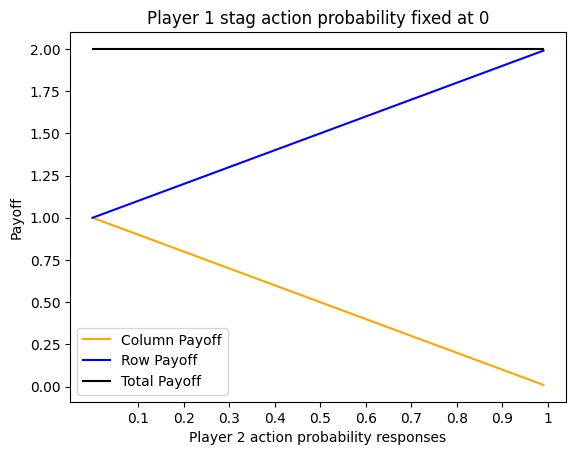

In [8]:
#Provide a graph based on the values returned from responses function and printed out above
import matplotlib.pyplot as plt

# Values for column payoffs
x_values = incrs  
y_values = rewards_col  
plt.plot(x_values, y_values, marker='', color="orange", label="Column Payoff")
# Values for row payoffs
y_values = rewards_row  
plt.plot(x_values, y_values, marker='', color="blue", label="Row Payoff")
# Values for total payoffs
y_values = total_payoffs  
plt.plot(x_values, y_values, marker='', color="black", label="Total Payoff")

x_ticks = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
x_labels = ['0.1', '0.2', '0.3', '0.4', '0.5', '0.6', '0.7', '0.8', '0.9', '1']
plt.xticks(x_ticks, x_labels)

plt.xlabel('Player 2 action probability responses')
plt.ylabel('Payoff')
plt.title('Player 1 stag action probability fixed at 0')
plt.legend()
plt.show()

<p>
Results show a similar trend when using increments of 0.25 and 0.01 for responses to a fixed action probability. 
</p>

<h3>Best Responses</h3>
<p>
The function presented in the cell below, best_responses, is used to gather all the best responses for two players using an incremental value. The calc_values function is used for each player at each increment.
</p>
<p>The idea behind this function is to calculate what is the best response for player 2, when player 1 uses an action probability of 0.2 on stag for example. Also, what is the best response for player 1, when player 2 uses an action probability of 0.2 on stag for example. The responses for both players are calculated when the opposing player is fixed at different increments. For example, fix player one action probability for stag at 0, then calculate the best response for player 2, the action probability on stag for player 2 which will give the best payoff using the same increment. If using increments of 0.2, is the best response for player 2, 0, 0.2, 0.4, 0.6, 0.8, or 1. Then the action probability for player 1 for stag is set to 0.2, and the best response for player 2 is calculated. Again, is it at 0, 0.2, 0.4, 0.6, 0.8, or 1. This process is repeated, in increments of 0.2 for player 1, to get the best response at each increment for player 2. Once that is complete, then player 2 is fixed at each increment, and the best response for player 1 is then calculated at each of these increments using the same approach.</p>
<p>
This function returns the best responses for each player at each of the increments. This is a useful reference to assist with playing a Normal Form Game (NFG), like stag hunt, which has two players and the same two possible actions for each player. 
</p>

In [9]:
# Function to calculate best responses for row player to a column player and vice versa.
# Pass the incremental value to this function. Any value from 0 to 1 - e.g. 0.2.
def best_responses(incr):

    incr_inner = incr
    incr_outer = incr_inner
    count = 0
    row_values = []
    col_values = []
    incr_values = []

    while count < 2: # two players

        action_outer = 0

        while action_outer <= 1:
            if count == 0:
                incr_values.append(action_outer)
            action_inner = 0
            best_payoff = 0
            best_action_value = 0

            while action_inner <= 1:
                if count == 0: # row player fixed
                    values = calc_values(action_outer, action_inner, payoffs)
                    value = values[9] # for column player total payoff at values[9]
                else: # column player fixed
                    values = calc_values(action_inner, action_outer, payoffs)
                    value = values[6] # for row player total payoff at values[6]                
                if value > best_payoff:
                    best_payoff = value
                    best_action_value = action_inner
                action_inner += incr_inner

            if count == 0:
                col_values.append(best_action_value)
            else:
                row_values.append(best_action_value)

            action_outer += incr_outer

        count += 1

    return row_values, col_values, incr_values

<p>
The increment value in the function above is fixed at 0.2. Again, other values for accessing the payoffs from the array are hardcoded as noted previously. 
</p>
<p>
Using this increment value of 0.2, to create the intervals in play, the function is invoked in the cell below and the results for best responses for each player at each interval is printed to the screen.
</p>

In [10]:
# code to test best_responses in increments of 0.2
row_values, col_values, incr_values = best_responses(0.2)
print("Row Values:", row_values)
print()
print("Column Values:", col_values)
print()
print("Incr Values:", incr_values)

Row Values: [0, 0, 1.0, 1.0, 1.0, 1.0]

Column Values: [0, 0, 1.0, 1.0, 1.0, 1.0]

Incr Values: [0, 0.2, 0.4, 0.6000000000000001, 0.8, 1.0]


<p>
From the results printed to the screen, we can see that the best responses are as follows
</p>
<table>
    <tr>
        <th>Row</th><th>Increments</th><th>P(S)_P1</th><th>P(S)_P2</th>
    </tr>
    <tr>
        <td>1</td><td>0</td><td>0</td><td>0</td>
    </tr>
    <tr>
        <td>2</td><td>0.2</td><td>0</td><td>0</td>
    </tr>
    <tr>
        <td>3</td><td>0.4</td><td>1</td><td>1</td>
    </tr>
    <tr>
        <td>4</td><td>0.6</td><td>1</td><td>1</td>
    </tr>
    <tr>
        <td>5</td><td>0.8</td><td>1</td><td>1</td>
    </tr>
    <tr>
        <td>6</td><td>1</td><td>1</td><td>1</td>
    </tr>
</table>
<b>Note:</b> Headings in table - P(S)_P1 represents action probability for stag for player 1. P(S)_P2 represents action probability for stag for player 2.
<p>
To explain the results in this table, look at row 5 for example in the table above. Increment is set at 0.8. For player 1, the best action probability to set stag to, is 1. The increment of 0.8, in this case represents the action probability used by player 2 for stag. Likewise, referring agin to row 5, the best action probability for player 2 is 1, when the action probability for stag for player 1 is set to 0.8. These best responses are calculated at increment of 0.2, so may not represent the actual best response. Would need a lower increment value to confirm this, but it gives a good indication at least.
</p>
<p>
In the cell below is some code to generate a plot showing the payoffs for each player in this example at each increment point.  
</p>

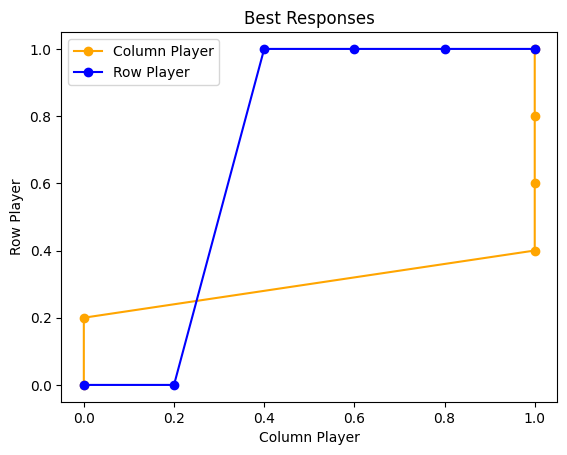

In [11]:
# Plot these values on a graph

# Column player actions
x_values = col_values  
y_values = incr_values  
plt.plot(x_values, y_values, marker='o', color="orange", label="Column Player")
# Row player actions
x_values = incr_values  
y_values = row_values  
plt.plot(x_values, y_values, marker='o', color="blue", label="Row Player")

plt.xlabel('Column Player')
plt.ylabel('Row Player')
plt.title('Best Responses')
plt.legend()
plt.show()

<h3>Test Best Responses</h3>
<p>
Perform another similar test on best responses, but this time using increments of 0.01 instead of 0.2, and shows results and graph.
</p>

In [12]:
# code to test best_responses in increments of 0.01
row_values, col_values, incr_values = best_responses(0.01)
print("Row Values:", row_values)
print()
print("Column Values:", col_values)
print()
print("Incr Values:", incr_values)

Row Values: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.08, 0.9900000000000007, 0.9900000000000007, 0.9900000000000007, 0.9900000000000007, 0.9900000000000007, 0.9900000000000007, 0.9900000000000007, 0.9900000000000007, 0.9900000000000007, 0.9900000000000007, 0.9900000000000007, 0.9900000000000007, 0.9900000000000007, 0.9900000000000007, 0.9900000000000007, 0.9900000000000007, 0.9900000000000007, 0.9900000000000007, 0.9900000000000007, 0.9900000000000007, 0.9900000000000007, 0.9900000000000007, 0.9900000000000007, 0.9900000000000007, 0.9900000000000007, 0.9900000000000007, 0.9900000000000007, 0.9900000000000007, 0.9900000000000007, 0.9900000000000007, 0.9900000000000007, 0.9900000000000007, 0.9900000000000007, 0.9900000000000007, 0.9900000000000007, 0.9900000000000007, 0.9900000000000007, 0.9900000000000007, 0.9900000000000007, 0.9900000000000007, 0.9900000000000007, 0.9900000000000007, 0.9900000000000007, 0.9900000000000007, 0.9900000000000007, 0.9900

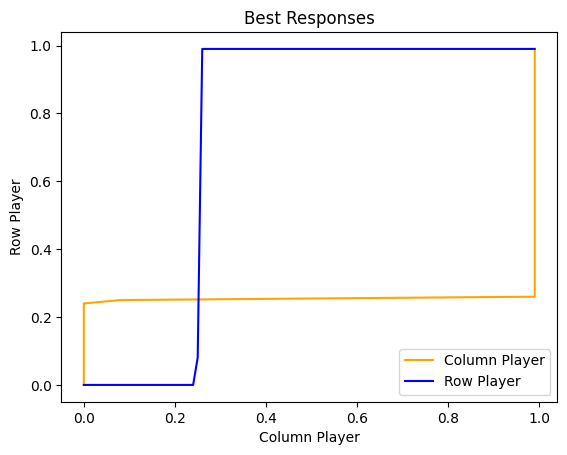

In [13]:
# Plot these values on a graph

# Column player actions
x_values = col_values  
y_values = incr_values  
plt.plot(x_values, y_values, marker='', color="orange", label="Column Player")
# Row player actions
x_values = incr_values  
y_values = row_values  
plt.plot(x_values, y_values, marker='', color="blue", label="Row Player")

plt.xlabel('Column Player')
plt.ylabel('Row Player')
plt.title('Best Responses')
plt.legend()
plt.show()

<p>
A similar output is achieved when using smaller intervals. Results provide better accuracy showing reponses between 0.2 and 0.4, where the best response changes to 1. When using increments of 0.2, when using 1 for best response, it indicates to use this response when opponent is at 0.4, but when using increments of 0.01, it indicates to use a response of 1 just above 0.2. So it is actually closer to 0.2 than 0.4. This provides a more accurate indicator.
</p>

<h3>Generic Implementation</h3>
<p>
What follows is just a different implementation to come up with the Best Responses graph. Implementation so far uses hard coded values for array index numbers, so reducing reliance on that which will make this approach extendable in terms of number of actions and potentially in the future the number of players. 
</p>
<p>
All possible values for playing are generated for different intervals, and 2 or 3 actions can be handled. The implementation is more generic so should be easier to extend if needed, for more than 3 actions though it may require further updates if looking to use more than 2 players.
</p>
<p>
To begin with a function, single_play_payoff, is created to calculate the payoffs for each of two players, for any NFG with 2 or 3 actions. It returns the payoff results for each of the two players for a single game. For example, player 1 has action probability of 0.2 for stag, 0.8 for hare, while player 2 has action probability of 0.6 for stag, 0.4 for hare. The payoff for total payoff for player 1 and the total payoff for player 2 is calculated and returned by the single_play_payoff function. Both values are contained in an array, and the array is returned by the function. The single_payoff_function calculates the payoffs only, and differs from the calc_values functions, which includes calculations for incentives to change. The incentive values calculations were included in calc_values function for testing and validation purposes, but are not actually required here.
</p>

In [14]:
def single_play_payoff(row, col, payoffs):
    probs = [] 
    no_of_actions = len(row)
    i = 0
    payoff = 0
    total_payoff = 0

    # row
    k = 0
    while i < no_of_actions:
        j = 0
        while j < no_of_actions:
            payoff += (payoffs[i][j][k] * col[j])
            j += 1
        total_payoff += (payoff * row[i])
        payoff = 0
        i += 1
    probs.append(total_payoff)

    # column
    total_payoff = payoff = j = 0
    k += 1
    while j < no_of_actions:
        i = 0
        while i < no_of_actions:
            payoff += (payoffs[i][j][k] * row[i])
            i += 1
        total_payoff += (payoff * col[j])
        payoff = 0
        j += 1
    probs.append(total_payoff)
    return probs    

<h3>Action Probabilities</h3>
<p>In the cell below, code exists to generate all combinations of action probabilities for all actions, using intervals (increments). For example if using intervals of 0.25 in a two player, two action game, the following combinations of action probabilities is generated by this code:</p>

<table>
    <tr>
        <th>Action 1</th><th>Action 2</th>
    </tr>
    <tr>
        <td>0</td><td>1</td>
    </tr>
    <tr>
        <td>0.25</td><td>0.75</td>
    </tr>
    <tr>
        <td>0.5</td><td>0.5</td>
    </tr>
    <tr>
        <td>0.75</td><td>0.25</td>
    </tr>
    <tr>
        <td>1</td><td>0</td>
    </tr>
</table>

<b>Note:</b> Action 1, if playing stag hunt is probability action for stag, while Action 2, if playing stag hunt is probability action for hare. 
<p>
Using these values it is possible to play player 1 with action 1 probability fixed at 0, and then use this to get payoffs for player 2, when its action 1 probability is set to 0, then set to 0.25, 0.5, 0.75 and finally 1. The inverse can be done to fix player 2, to get payoffs for player 1. Players can be fixed at each interval, and on fixing them at each interval, play against those values, using all the intervals to deteremine the best payoff.
</p>
<p>
In a Normal Form Game like stag hunt, the results for both players, will end up the same. If player 1 uses an action probability of 1 for Action 1, then the best payoff for player 2 can be achieved by it setting its action probability for Action 1 to 1. Similarly, if player 2 uses an action probability of 1 for Action 1, then the best payoff for player 2 can be achieved by it setting its action probability for Action 1 to 1. So realistically in this type of game, only the calculations to determine the best strategy for one player is required when playing against an opponent at fixed interval values. The process does not need to be repeated for the other player, as the results will be the same. While this is generally understood, calculations for both players is performed here, just to confirm that. 
</p>
<p>
Some Normal Form Games though do require calculations for both players, as results will be different. An example of such a game is matching pennies which is also demonstrated further on in this notebook. In Matching pennies, it is required for player 1 to match the the choice of player 2 to gain a reward, while player2 gets a reward if their choice does not match the choice of player 1. The rewards in this scenario present different incentives for each of the players, so a strategy for both needs to be calculated. A game like stag hunt uses a reward structure where rewards are based on players cooperating or defecting. If both cooperate you get the highest reward, If both defect, you get a lower reward. With this type of game the best strategy for one player can be worked out, and this will also be the best strategy for the other player.
</p>

In [15]:
# ref: for itertools - https://docs.python.org/3/library/itertools.html
from itertools import combinations_with_replacement
from itertools import permutations

def generate_probabilities(intervals, actions):
    combinations = combinations_with_replacement(intervals, actions)
    valid_combinations = [c for c in combinations if sum(c) == 1]

    all_permutations = []
    for combination in valid_combinations:
        unique_permutations = set(permutations(combination))
        all_permutations.extend(unique_permutations)

    return all_permutations

def generate_action_probabilities(increments, actions):
    intervals = [round(i, 2) for i in list(float(x) * increments for x in range(0, int(1 / increments) + 1))]
    print(intervals)
    all_actions = generate_probabilities(intervals, actions)
    return all_actions


<h3>Play All Combinations</h3>
<p>
The second function below, lets_play, is used to play all possible combinations of action probabilities for one player against all possible combinations of action probabilities for another player. This function generates all combinations, envoking the code from the cell above, and uses the output from this code to play all possible combinations for both players. This function is currently restricted to 2 players, and 2 or 3 actions.
</p>
<p>
For playing all possible combinations from both players, the lets_play function uses the probabilityActions_rewards function (the first function below). The probabilityActions_rewards calculates the payoffs for each possible combinations of action probabilities, and calculates the best payoff at each increment for each player.  
</p>
<p>
It is important to note here, if its not already clear, that each player, when determing what action probabilities produce the best payoff, are playing an opponent with a fixed strategy at each increment. Player 1 for example has proabability action 1 fixed at 1, so player 2 plays with probability action 1 set at 0, 0.25, 0.5, 0.75, and 1 if using increments of 0.25, to determine which of these action probabilities produces the best payoff for player 2. The inverse of this is done to produce the best payoff for player 1 when using increments of 0.25.  
</p>
<p>
The lets_play function accepts the increment values, the payoff function (defined as a matrix), and number of actions. It returns the best action probability to achieve the best payoff for each player at each fixed interval of its opponent. Results will end up the same as if playing stag hunt, similar to how best_action_responses function was demonstrated above. 
</p>

In [16]:
# Implementation of Algorithm 1 from Paper 1
# Note that Algorithm 1 describes a nested loop, but here it is implemented using two nested loops. 
# The nested loop from Algorithm 1, is replicated, so that one nested loop deals with column player payoffs 
# and the other nested loop deals with row player payoffs. 

def probabilityActions_rewards(rows, columns):
    row_index = 0
    col_index = 0

    total_payoffs_cols = []
    total_payoffs_rows = []
    row_payoffs = []
    col_payoffs = []

    # calculate best col response to fixed row values
    length = len(rows)
    while row_index < length:
        while col_index < length:
            probs = single_play_payoff(rows[row_index], columns[col_index], payoffs)
            total_payoffs_cols.append(probs[1]) # probs[1] contains payoff total for column player
            col_index += 1
        col_payoffs.append(total_payoffs_cols.index(max(total_payoffs_cols)))
        total_payoffs_cols = []
        col_index = 0
        row_index += 1

    col_index = row_index = 0

    # calculate best row response to fixed col values
    while col_index < length:
        while row_index < length:
            probs = single_play_payoff(rows[row_index], columns[col_index], payoffs)
            total_payoffs_rows.append(probs[0]) # probs[0] contains payoff total for row player
            row_index += 1
        row_payoffs.append(total_payoffs_rows.index(max(total_payoffs_rows)))
        total_payoffs_rows = []
        row_index = 0
        col_index += 1
    
    return row_payoffs, col_payoffs

In [17]:
def lets_play(increments, payoffs, actions):
    all_actions = generate_action_probabilities(increments, actions)

    # have a restriction here only 2 or 3 actions. 
    # may need to redesign if require different number of actions - could use a loop instead
    all_actions = sorted(all_actions, key=lambda x: x[0])
    if actions == 2: # for e.g. stag hunt
        all_actions = [(round(x, 2), round(y, 2)) for x, y in all_actions]
    elif actions == 3: # for e.g. rock paper scissors
        all_actions = [(round(x, 2), round(y, 2), round(z, 2)) for x, y, z in all_actions]

    print(all_actions)

    rows = all_actions
    columns = all_actions

    row_payoffs, col_payoffs = probabilityActions_rewards(rows, columns)
    return row_payoffs, col_payoffs, rows, columns

<p>
In the cell below, testing the lets_play function using stag hunt with increments of 0.2 again. Results are returned and processed to produce the next graph below. Note that the results presented in the next graph are the same as those results presented in the last graph. This confirms approach for generating all the action probabilities and the lets_play function are working as expected. This confirms the modified approach used here works and creates a template to use to creating code to handle more than 3 actions, and potentially more than 2 players in the future.
</p>

In [18]:
increments = 0.2
actions = 2
# stag
payoffs = [
    [[5, 5], [0, 2]],
    [[2, 0], [1, 1]]
]
row_payoffs, col_payoffs, rows, columns = lets_play(increments, payoffs, actions)

[0.0, 0.2, 0.4, 0.6, 0.8, 1.0]
[(0.0, 1.0), (0.2, 0.8), (0.4, 0.6), (0.6, 0.4), (0.8, 0.2), (1.0, 0.0)]


In [19]:
col_values = []
row_values = []
count = 0
while count < len(col_payoffs):
    col_values.append(columns[col_payoffs[count]][0])
    row_values.append(rows[row_payoffs[count]][0])
    count += 1

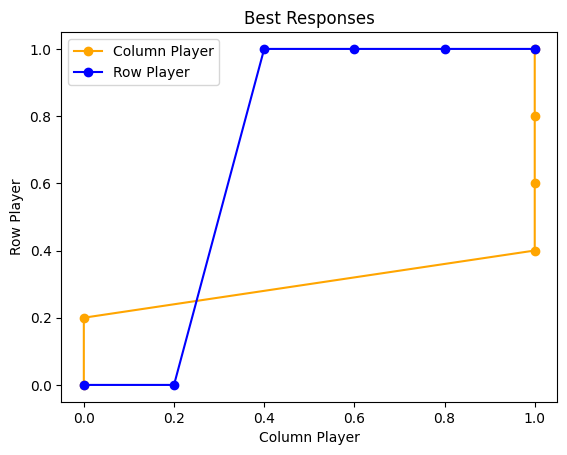

In [20]:
# Plot these values on a graph
import matplotlib.pyplot as plt

# increments values for use on both x and y axis 
incr_values = []
count = 0
while count < len(rows):
    incr_values.append(rows[count][0])
    count += 1

# Column player actions
x_values = col_values 
y_values = incr_values
plt.plot(x_values, y_values, marker='o', color="orange", label="Column Player")
# Row player actions
x_values = incr_values  
y_values = row_values  
plt.plot(x_values, y_values, marker='o', color="blue", label="Row Player")

plt.xlabel('Column Player')
plt.ylabel('Row Player')
plt.title('Best Responses')
plt.legend()
plt.show()

<h3>Test Best Responses</h3>
<p>
Rerun the test just performed using increments of 0.01, instead of 0.2.
</p>

In [21]:
increments = 0.01
actions = 2
# stag
payoffs = [
    [[5, 5], [0, 2]],
    [[2, 0], [1, 1]]
]
row_payoffs, col_payoffs, rows, columns = lets_play(increments, payoffs, actions)

[0.0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2, 0.21, 0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3, 0.31, 0.32, 0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4, 0.41, 0.42, 0.43, 0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5, 0.51, 0.52, 0.53, 0.54, 0.55, 0.56, 0.57, 0.58, 0.59, 0.6, 0.61, 0.62, 0.63, 0.64, 0.65, 0.66, 0.67, 0.68, 0.69, 0.7, 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77, 0.78, 0.79, 0.8, 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88, 0.89, 0.9, 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99, 1.0]
[(0.0, 1.0), (0.01, 0.99), (0.02, 0.98), (0.03, 0.97), (0.04, 0.96), (0.05, 0.95), (0.06, 0.94), (0.07, 0.93), (0.08, 0.92), (0.09, 0.91), (0.1, 0.9), (0.11, 0.89), (0.12, 0.88), (0.13, 0.87), (0.14, 0.86), (0.15, 0.85), (0.16, 0.84), (0.17, 0.83), (0.18, 0.82), (0.19, 0.81), (0.2, 0.8), (0.21, 0.79), (0.22, 0.78), (0.23, 0.77), (0.24, 0.76), (0.25, 0.75), (0.26, 0.74), (0.27, 0.73), (0.28, 0.72), (0.

In [22]:
col_values = []
row_values = []
count = 0
while count < len(col_payoffs):
    col_values.append(columns[col_payoffs[count]][0])
    row_values.append(rows[row_payoffs[count]][0])
    count += 1

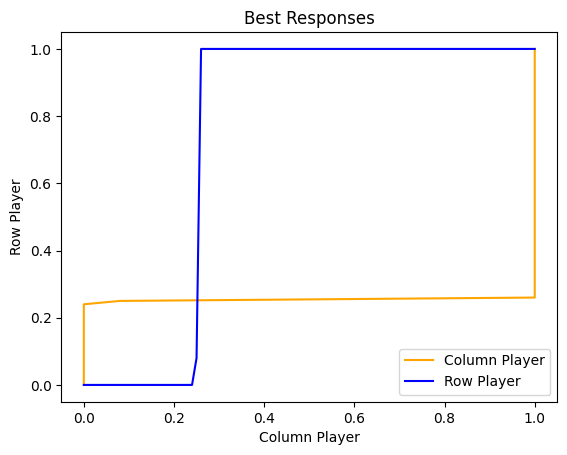

In [23]:
# Plot these values on a graph
import matplotlib.pyplot as plt

# increments values for use on both x and y axis 
incr_values = []
count = 0
while count < len(rows):
    incr_values.append(rows[count][0])
    count += 1

# Column player actions
x_values = col_values 
y_values = incr_values
plt.plot(x_values, y_values, marker='', color="orange", label="Column Player")
# Row player actions
x_values = incr_values  
y_values = row_values  
plt.plot(x_values, y_values, marker='', color="blue", label="Row Player")

plt.xlabel('Column Player')
plt.ylabel('Row Player')
plt.title('Best Responses')
plt.legend()
plt.show()

<p>
Generic approach using increments of 0.2 and also 0.01, produces the same results as previously seen.
</p>

<h3>Three Actions</h3>
<p>
Peforming a test here using the game rock, paper, scissors. This is a useful example to demonstrate an NFG with 3 actions. A payoff function (represented as a matrix) is provided below, with increments of 0.25, and number of actions set to 3. These values are passed to the lets_play function, results returned are printed out.
</p>

In [24]:
# rock paper scissors
payoffs = [
    [[0, 0], [-1, 1], [1, -1]],
    [[1, -1], [0, 0], [-1, 1]],
    [[-1, 1], [1, -1], [0, 0]]
]

increments = 0.25
actions = 3

row_payoffs, col_payoffs, rows, columns = lets_play(increments, payoffs, actions)

[0.0, 0.25, 0.5, 0.75, 1.0]
[(0.0, 0.0, 1.0), (0.0, 1.0, 0.0), (0.0, 0.75, 0.25), (0.0, 0.25, 0.75), (0.0, 0.5, 0.5), (0.25, 0.0, 0.75), (0.25, 0.75, 0.0), (0.25, 0.5, 0.25), (0.25, 0.25, 0.5), (0.5, 0.5, 0.0), (0.5, 0.0, 0.5), (0.5, 0.25, 0.25), (0.75, 0.0, 0.25), (0.75, 0.25, 0.0), (1.0, 0.0, 0.0)]


<p>
Output shown above shows all combinations of action probabilities for increments of 0.25 when 3 actions are used. All action probabilities add up to 1 for each game. For example, 0, 0.75, 0.25 gives 1 (0 + 0.25 + 0.75). 
</p>

In [25]:
# Have the index values in row_payoffs and col_payoffs, need to get the lists from rows and columns arrays
# to update row_payoffs and col_payoffs from index values to actual values, so you know (0, 1.0, 0) is best response
# for row to columns (1.0, 0, 0) order of list is (paper, scissors, rock)

count = 0
while count < len(rows):
    row_payoffs[count] = rows[row_payoffs[count]]
    col_payoffs[count] = columns[col_payoffs[count]]
    count += 1

# have the output, just not sure how to graph it...
print("row_payoffs:", row_payoffs)
print("col_payoffs:", col_payoffs)


row_payoffs: [(1.0, 0.0, 0.0), (0.0, 0.0, 1.0), (0.0, 0.0, 1.0), (1.0, 0.0, 0.0), (0.0, 0.0, 1.0), (1.0, 0.0, 0.0), (0.0, 0.0, 1.0), (0.0, 0.0, 1.0), (1.0, 0.0, 0.0), (0.0, 1.0, 0.0), (1.0, 0.0, 0.0), (0.0, 1.0, 0.0), (0.0, 1.0, 0.0), (0.0, 1.0, 0.0), (0.0, 1.0, 0.0)]
col_payoffs: [(1.0, 0.0, 0.0), (0.0, 0.0, 1.0), (0.0, 0.0, 1.0), (1.0, 0.0, 0.0), (0.0, 0.0, 1.0), (1.0, 0.0, 0.0), (0.0, 0.0, 1.0), (0.0, 0.0, 1.0), (1.0, 0.0, 0.0), (0.0, 1.0, 0.0), (1.0, 0.0, 0.0), (0.0, 1.0, 0.0), (0.0, 1.0, 0.0), (0.0, 1.0, 0.0), (0.0, 1.0, 0.0)]


<p>
Output above shows each game, and what the best responses are. For example, take the first entries for both row_payoffs (1.0, 0.0, 0.0) and col_payoffs (1.0, 0.0, 0.0). For both players this is their best responses to an opponent playing (0.0, 0.0, 1.0). The order of the values is paper, scissors, rock. Paper covers rock, so paper wins.
</p>
<p>
On testing again, using smaller increments. Instead of increments of 0.25, use increments of 0.01, and check the results.
</p>

In [26]:
# rock paper scissors
payoffs = [
    [[0, 0], [-1, 1], [1, -1]],
    [[1, -1], [0, 0], [-1, 1]],
    [[-1, 1], [1, -1], [0, 0]]
]

increments = 0.01
actions = 3

row_payoffs, col_payoffs, rows, columns = lets_play(increments, payoffs, actions)

[0.0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2, 0.21, 0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3, 0.31, 0.32, 0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4, 0.41, 0.42, 0.43, 0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5, 0.51, 0.52, 0.53, 0.54, 0.55, 0.56, 0.57, 0.58, 0.59, 0.6, 0.61, 0.62, 0.63, 0.64, 0.65, 0.66, 0.67, 0.68, 0.69, 0.7, 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77, 0.78, 0.79, 0.8, 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88, 0.89, 0.9, 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99, 1.0]
[(0.0, 0.0, 1.0), (0.0, 1.0, 0.0), (0.0, 0.01, 0.99), (0.0, 0.99, 0.01), (0.0, 0.98, 0.02), (0.0, 0.02, 0.98), (0.0, 0.03, 0.97), (0.0, 0.97, 0.03), (0.0, 0.04, 0.96), (0.0, 0.96, 0.04), (0.0, 0.95, 0.05), (0.0, 0.05, 0.95), (0.0, 0.94, 0.06), (0.0, 0.06, 0.94), (0.0, 0.93, 0.07), (0.0, 0.07, 0.93), (0.0, 0.08, 0.92), (0.0, 0.92, 0.08), (0.0, 0.91, 0.09), (0.0, 0.09, 0.91), (0.0, 0.1, 0.9), (0.0, 0.9,

In [27]:
# Have the index values in row_payoffs and col_payoffs, need to get the lists from rows and columns arrays
# to update row_payoffs and col_payoffs from index values to actual values, so you know (0, 1.0, 0) is best response
# for row to columns (1.0, 0, 0) order of list is (paper, scissors, rock)

count = 0
while count < len(rows):
    row_payoffs[count] = rows[row_payoffs[count]]
    col_payoffs[count] = columns[col_payoffs[count]]
    count += 1

# have the output, just not sure how to graph it...
print("row_payoffs:", row_payoffs)
print("col_payoffs:", col_payoffs)

row_payoffs: [(1.0, 0.0, 0.0), (0.0, 0.0, 1.0), (1.0, 0.0, 0.0), (0.0, 0.0, 1.0), (0.0, 0.0, 1.0), (1.0, 0.0, 0.0), (1.0, 0.0, 0.0), (0.0, 0.0, 1.0), (1.0, 0.0, 0.0), (0.0, 0.0, 1.0), (0.0, 0.0, 1.0), (1.0, 0.0, 0.0), (0.0, 0.0, 1.0), (1.0, 0.0, 0.0), (0.0, 0.0, 1.0), (1.0, 0.0, 0.0), (1.0, 0.0, 0.0), (0.0, 0.0, 1.0), (0.0, 0.0, 1.0), (1.0, 0.0, 0.0), (1.0, 0.0, 0.0), (0.0, 0.0, 1.0), (1.0, 0.0, 0.0), (0.0, 0.0, 1.0), (0.0, 0.0, 1.0), (1.0, 0.0, 0.0), (1.0, 0.0, 0.0), (0.0, 0.0, 1.0), (0.0, 0.0, 1.0), (1.0, 0.0, 0.0), (1.0, 0.0, 0.0), (0.0, 0.0, 1.0), (0.0, 0.0, 1.0), (1.0, 0.0, 0.0), (1.0, 0.0, 0.0), (0.0, 0.0, 1.0), (0.0, 0.0, 1.0), (1.0, 0.0, 0.0), (0.0, 0.0, 1.0), (1.0, 0.0, 0.0), (0.0, 0.0, 1.0), (1.0, 0.0, 0.0), (0.0, 0.0, 1.0), (1.0, 0.0, 0.0), (0.0, 0.0, 1.0), (1.0, 0.0, 0.0), (0.0, 0.0, 1.0), (1.0, 0.0, 0.0), (0.0, 0.0, 1.0), (1.0, 0.0, 0.0), (0.0, 0.0, 1.0), (1.0, 0.0, 0.0), (1.0, 0.0, 0.0), (0.0, 0.0, 1.0), (0.0, 0.0, 1.0), (1.0, 0.0, 0.0), (1.0, 0.0, 0.0), (0.0, 0.0, 1.0), 

<p>
Results using smaller increments are as expected.
</p>

<h3>Matching Pennies</h3>

<p>
As mentioned earlier, some games like Stag Hunt, the best strategy for one player, would also be the best strategy for another player. This was also the case with Rock, Paper, Scissors. You only need to work out the strategy for one player, and not both players. The type of games these are, and the payoff functions used determine this. 
</p>
<p>
Matching Pennies is an example of a Normal Form Game, where the stategies for both players differs, so the strategy for both must be worked out. If player 1 chooses heads, and player 2 also chooses heads, then player 1 gets the reward and player 2 gets no reward. If though player 2 chose tails instead, then player 2 gets the reward and player 1 gets no reward. Strategy for player 1 is to match to get reward, while strategy for player 2 is not to match to get reward. Based on these differing strategies for each player in this example, it is necessary to calculate the strategy for both players.   
</p>
<p>
Below is an example of using matching pennies with two players and calculating both their strategies. The payoff function (matrix) is shown, and results are presented in a graph to illustrate the different strategies for both players.
</p>

In [28]:
increments = 0.2
actions = 2
# matching pennies
payoffs = [
    [[1, -1], [-1, 1]],
    [[-1, 1], [1, -1]]
]
row_payoffs, col_payoffs, rows, columns = lets_play(increments, payoffs, actions)

[0.0, 0.2, 0.4, 0.6, 0.8, 1.0]
[(0.0, 1.0), (0.2, 0.8), (0.4, 0.6), (0.6, 0.4), (0.8, 0.2), (1.0, 0.0)]


In [29]:
col_values = []
row_values = []
count = 0
while count < len(col_payoffs):
    col_values.append(columns[col_payoffs[count]][0])
    row_values.append(rows[row_payoffs[count]][0])
    count += 1

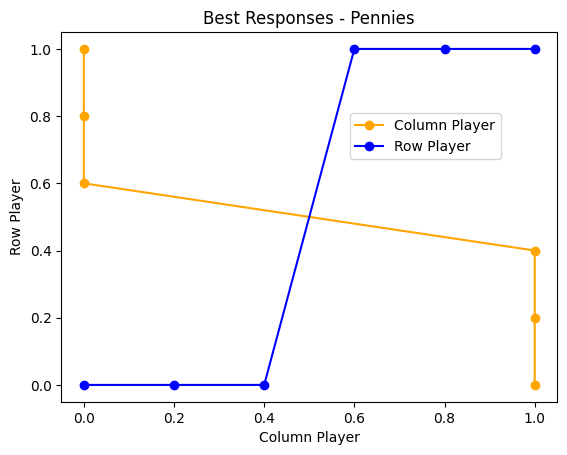

In [30]:
# Plot these values on a graph
import matplotlib.pyplot as plt

# increments values for use on both x and y axis 
incr_values = []
count = 0
while count < len(rows):
    incr_values.append(rows[count][0])
    count += 1

# Column player actions
x_values = col_values 
y_values = incr_values
plt.plot(x_values, y_values, marker='o', color="orange", label="Column Player")
# Row player actions
x_values = incr_values  
y_values = row_values  
plt.plot(x_values, y_values, marker='o', color="blue", label="Row Player")

plt.xlabel('Column Player')
plt.ylabel('Row Player')
plt.title('Best Responses - Pennies')
#plt.legend()
x = 0.9
y = 0.8
plt.legend(loc='upper right', bbox_to_anchor=(x, y))
plt.show()

<p>
Testing matching pennies again but with smaller increments. Using 0.01 instead of 0.2
<p>

In [31]:
increments = 0.01
actions = 2
# matching pennies
payoffs = [
    [[1, -1], [-1, 1]],
    [[-1, 1], [1, -1]]
]
row_payoffs, col_payoffs, rows, columns = lets_play(increments, payoffs, actions)

[0.0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2, 0.21, 0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3, 0.31, 0.32, 0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4, 0.41, 0.42, 0.43, 0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5, 0.51, 0.52, 0.53, 0.54, 0.55, 0.56, 0.57, 0.58, 0.59, 0.6, 0.61, 0.62, 0.63, 0.64, 0.65, 0.66, 0.67, 0.68, 0.69, 0.7, 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77, 0.78, 0.79, 0.8, 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88, 0.89, 0.9, 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99, 1.0]
[(0.0, 1.0), (0.01, 0.99), (0.02, 0.98), (0.03, 0.97), (0.04, 0.96), (0.05, 0.95), (0.06, 0.94), (0.07, 0.93), (0.08, 0.92), (0.09, 0.91), (0.1, 0.9), (0.11, 0.89), (0.12, 0.88), (0.13, 0.87), (0.14, 0.86), (0.15, 0.85), (0.16, 0.84), (0.17, 0.83), (0.18, 0.82), (0.19, 0.81), (0.2, 0.8), (0.21, 0.79), (0.22, 0.78), (0.23, 0.77), (0.24, 0.76), (0.25, 0.75), (0.26, 0.74), (0.27, 0.73), (0.28, 0.72), (0.

In [32]:
col_values = []
row_values = []
count = 0
while count < len(col_payoffs):
    col_values.append(columns[col_payoffs[count]][0])
    row_values.append(rows[row_payoffs[count]][0])
    count += 1

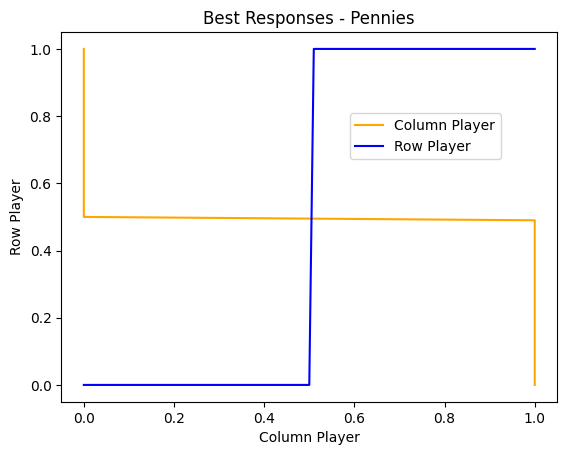

In [33]:
# Plot these values on a graph
import matplotlib.pyplot as plt

# increments values for use on both x and y axis 
incr_values = []
count = 0
while count < len(rows):
    incr_values.append(rows[count][0])
    count += 1

# Column player actions
x_values = col_values 
y_values = incr_values
plt.plot(x_values, y_values, marker='', color="orange", label="Column Player")
# Row player actions
x_values = incr_values  
y_values = row_values  
plt.plot(x_values, y_values, marker='', color="blue", label="Row Player")

plt.xlabel('Column Player')
plt.ylabel('Row Player')
plt.title('Best Responses - Pennies')
#plt.legend()
x = 0.9
y = 0.8
plt.legend(loc='upper right', bbox_to_anchor=(x, y))
plt.show()

<p>
Results using smaller increments are as expected. Looking at the graph, the change from 0 to 1 as best response for both players happens closer to 0.5, whereas when reviewing the results from using increments of 0.2, the best response occurs somehwere from 0.4 to 0.6. A more accurate indication of where to change strategy is evident when using smaller increments.
</p>

<h3>Prisoner Dilemma</h3>
<p>
A very well known NFG is prisoner dilemma. Similar to stag hunt, the strategy for one player to achieve best response against a player playing a fixed strategy is the same for any player. Prisoner dilemma is included here just to further confirm this and present the results. 
</p>

In [34]:
increments = 0.01
actions = 2
# prisoner dilemma
payoffs = [
    [[2, 2], [0, 3]],
    [[3, 0], [1, 1]]
]
row_payoffs, col_payoffs, rows, columns = lets_play(increments, payoffs, actions)

[0.0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2, 0.21, 0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3, 0.31, 0.32, 0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4, 0.41, 0.42, 0.43, 0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5, 0.51, 0.52, 0.53, 0.54, 0.55, 0.56, 0.57, 0.58, 0.59, 0.6, 0.61, 0.62, 0.63, 0.64, 0.65, 0.66, 0.67, 0.68, 0.69, 0.7, 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77, 0.78, 0.79, 0.8, 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88, 0.89, 0.9, 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99, 1.0]
[(0.0, 1.0), (0.01, 0.99), (0.02, 0.98), (0.03, 0.97), (0.04, 0.96), (0.05, 0.95), (0.06, 0.94), (0.07, 0.93), (0.08, 0.92), (0.09, 0.91), (0.1, 0.9), (0.11, 0.89), (0.12, 0.88), (0.13, 0.87), (0.14, 0.86), (0.15, 0.85), (0.16, 0.84), (0.17, 0.83), (0.18, 0.82), (0.19, 0.81), (0.2, 0.8), (0.21, 0.79), (0.22, 0.78), (0.23, 0.77), (0.24, 0.76), (0.25, 0.75), (0.26, 0.74), (0.27, 0.73), (0.28, 0.72), (0.

In [35]:
col_values = []
row_values = []
count = 0
while count < len(col_payoffs):
    col_values.append(columns[col_payoffs[count]][0])
    row_values.append(rows[row_payoffs[count]][0])
    count += 1

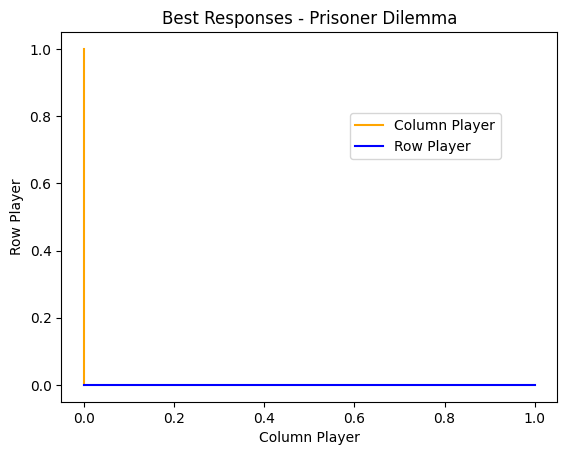

In [37]:
# Plot these values on a graph
import matplotlib.pyplot as plt

# increments values for use on both x and y axis 
incr_values = []
count = 0
while count < len(rows):
    incr_values.append(rows[count][0])
    count += 1

# Column player actions
x_values = col_values 
y_values = incr_values
plt.plot(x_values, y_values, marker='', color="orange", label="Column Player")
# Row player actions
x_values = incr_values  
y_values = row_values  
plt.plot(x_values, y_values, marker='', color="blue", label="Row Player")

plt.xlabel('Column Player')
plt.ylabel('Row Player')
plt.title('Best Responses - Prisoner Dilemma')
#plt.legend()
x = 0.9
y = 0.8
plt.legend(loc='upper right', bbox_to_anchor=(x, y))
plt.show()

<p>
Results are as expected. The best reponse for any player to a fixed strategy in prisoner dilemma is always 0. The output on the graph demonstrates this.
</p>